# Bellingcat Shadow Finder ☀️🌐

<a href="https://www.bellingcat.com"><img alt="Bellingcat logo: Discover Bellingcat" src="https://img.shields.io/badge/Discover%20Bellingcat-%20?style=for-the-badge&logo=data%3Aimage%2Fpng%3Bbase64%2CiVBORw0KGgoAAAANSUhEUgAAAA4AAAAYCAYAAADKx8xXAAABhGlDQ1BJQ0MgcHJvZmlsZQAAKJF9kT1Iw0AcxV9TS0UqDnZQEcxQneyiIo6likWwUNoKrTqYXPoFTRqSFBdHwbXg4Mdi1cHFWVcHV0EQ%2FABxdnBSdJES%2F5cUWsR4cNyPd%2Fced%2B8AoVllqtkTA1TNMtKJuJjLr4rBVwQwhhBEDEvM1JOZxSw8x9c9fHy9i%2FIs73N%2Fjn6lYDLAJxLHmG5YxBvEs5uWznmfOMzKkkJ8Tjxp0AWJH7kuu%2FzGueSwwDPDRjY9TxwmFktdLHcxKxsq8QxxRFE1yhdyLiuctzir1Tpr35O%2FMFTQVjJcpzmKBJaQRIo6klFHBVVYiNKqkWIiTftxD%2F%2BI40%2BRSyZXBYwcC6hBheT4wf%2Fgd7dmcXrKTQrFgcCLbX%2BMA8FdoNWw7e9j226dAP5n4Err%2BGtNYO6T9EZHixwBA9vAxXVHk%2FeAyx1g6EmXDMmR%2FDSFYhF4P6NvygODt0Dfmttbex%2BnD0CWulq%2BAQ4OgYkSZa97vLu3u7d%2Fz7T7%2BwHEU3LHAa%2FQ6gAAAAZiS0dEAAAAAAAA%2BUO7fwAAAAlwSFlzAAAuIwAALiMBeKU%2FdgAAAAd0SU1FB%2BgFHwwiMH4odB4AAAAZdEVYdENvbW1lbnQAQ3JlYXRlZCB3aXRoIEdJTVBXgQ4XAAAA50lEQVQ4y82SvWpCQRCFz25ERSJiCNqlUiS1b5AuEEiZIq1NOsGXCKms0wXSp9T6dskDiFikyiPc%2FrMZyf3FXSGQ0%2BzuzPl2ZoeVKgQ0gQ2wBVpVHlcDkjM5V%2FJ5nag6sJ%2FZX%2Bh%2FC7gEhqeAFKf7p1M9aB3b5oN1OomB7g1axUBPBr3GQHODHmOgqUF3MZAzKI2d4LWBV4H%2BMXDuJd1a7Cew1k7SwksaHC4LqNaw7aeX9GWHXkC1G1sTAS17Y3Kk2lnp4wNLiz0DrgLq8qt2MfmSSabAO%2FBBXp26dtrADPjOmN%2BAUdG7B3cE61l5hOZiAAAAAElFTkSuQmCC&logoColor=%23fff&color=%23000"></a><!--
--><a href="https://discord.gg/bellingcat"><img alt="Discord logo: Join our community" src="https://img.shields.io/badge/Join%20our%20community-%20?style=for-the-badge&logo=discord&logoColor=%23fff&color=%235865F2"></a><!--
--><a href="https://github.com/bellingcat/ShadowFinder"><img alt="Github logo: Explore the code" src="https://img.shields.io/badge/Explore%20the%20code-%20?style=for-the-badge&logo=github&color=%2329903b"></a>

A tool to estimate the points on the Earth's surface where a shadow of a particular length could occur, for geolocation purposes.

Using an object's height and the length of its shadow (or the angle to the sun) with the date and the time, this code estimates the possible locations of that shadow.

> <font color='#ffc107'>Important:</font> The shadow length must be measured at right angles to the object 📐 This means that you might have to correct for the perspective of an image before using this tool.

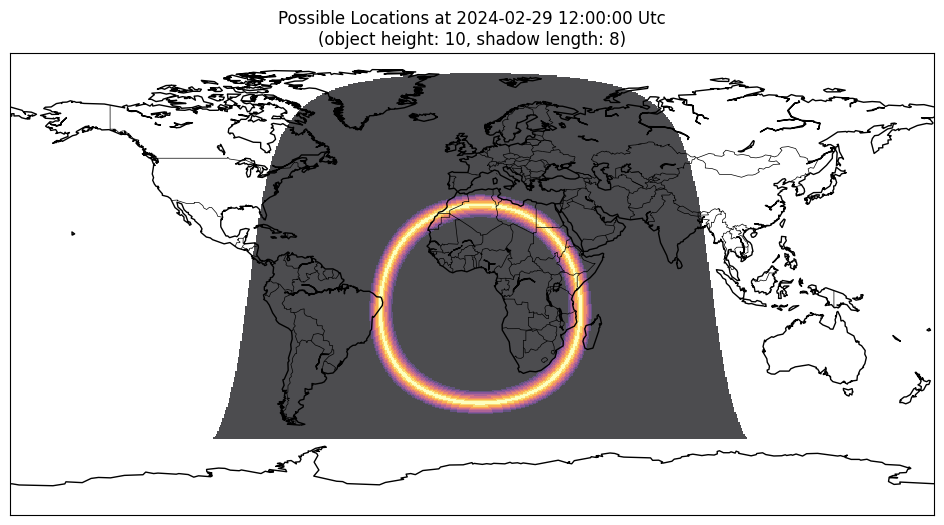

In [1]:
# @title Find a Shadow 🔎 { display-mode: "form" }

# @markdown ### ⬅️ Click to find possible locations that match the below information

# @markdown Either give object and shadow measurements (at right angles in arbitrary units):
object_height = 10  # @param {type:"number"} Height of object in arbitrary units
shadow_length = 8  # @param {type:"number"} Length of shadow in arbitrary units

# @markdown Or give the elevation angle to the sun directly (in degrees):
angle_to_sun = None  # @param {type:"number"} Length of shadow in arbitrary units

# @markdown Date and time can be given in UTC or local time (set `time type` accordingly), using the time format hh:mm:ss
date = "2024-02-29"  # @param {type:"date"}
time = "12:00:00"  # @param {type:"string"}
time_type = "utc"  # @param ["utc", "local"]

# Create output files
output = f"./shadowfinder_{object_height}_{shadow_length}_{date}T{time}.png"
logfile = f"./shadowfinder_{object_height}_{shadow_length}_{date}T{time}.log"

# Imports
![ ! -f "timezone_grid.json" ] && wget https://raw.githubusercontent.com/bellingcat/ShadowFinder/main/timezone_grid.json >> {logfile} 2>&1
![ ! -f "deps_loaded" ] && pip install shadowfinder >> {logfile} 2>&1 && touch deps_loaded

from shadowfinder import ShadowFinder
import datetime

datetime_date = datetime.datetime.strptime(date, "%Y-%m-%d").date()
datetime_time = datetime.datetime.strptime(time, "%H:%M:%S").time()

date_time = datetime.datetime.combine(
    datetime_date, datetime_time
)  # Date and time of interest

if "finder" not in locals():
    finder = ShadowFinder()
    # check if timezones.npz exists
    try:
        finder.load_timezone_grid()
    except FileNotFoundError:
        finder.generate_timezone_grid()
        finder.save_timezone_grid()

try:
    finder.set_details(
        date_time=date_time,
        object_height=object_height,
        shadow_length=shadow_length,
        time_format=time_type,
        sun_altitude_angle=angle_to_sun,
    )
    finder.find_shadows()
    fig = finder.plot_shadows()
except (ValueError, AssertionError) as e:
    print(f"\033[91m{e}\033[0m")